In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(1)

%matplotlib inline
np.random.seed(1)

## Multivariate case

We are trying to minimise $\sum \xi_i^2$. This time $ f = Xw$ where $w$ is Dx1 and $X$ is NxD.

\begin{align}
\mathcal{L} & = \frac{1}{N} (y-Xw)^T(y-Xw) \\
\frac{\delta\mathcal{L}}{\delta w} & = -\frac{1}{N} 2\left(\frac{\delta f(X,w)}{\delta w}\right)^T(y-Xw) \\ 
& = -\frac{2}{N} \left(\frac{\delta f(X,w)}{\delta w}\right)^T\xi
\end{align}
where $\xi_i$ is the error term $y_i-f(X,w)$ and 
$$
\frac{\delta f(X,w)}{\delta w} = X
$$

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

In [3]:
N = 1000
D = 5
X = 5*np.random.randn(N,D)
w_true = np.random.randn(D,1)
y = X.dot(w_true)
y_obs = y + np.random.randn(N,1)

In [4]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
model.coef_.T

array([[-0.92475528],
       [ 1.1288899 ],
       [-1.12879127],
       [-0.72473762],
       [ 0.62357121]])

## Stochastic Gradient Descent

In [ ]:
def dL_dw(X,e,w):
    return -2*e*X.T/len(X)

def loss_function(e):
    L = e.T.dot(e)/N
    return L

In [15]:

def Nadam(X,y_obs,alpha=0.1, mu = 0.9, nu=0.999,epsilon=1e-8):
    #Initialisation des paramétres 
    N = len(X)
    D = len(X[0])
    # les conditions initiales
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((N,1))
    Loss = np.zeros((N,1))
    m = np.zeros((D,1))
    n = np.zeros((D,1))
    muI = mu
    nuI = 1
    for i in range(N):
        params.append(w)
        idx = np.random.choice(N,1,replace=False)
        e = y_obs[idx] - X[idx].dot(w)
        #just for testing
        ##########################
        e_global = y_obs - X.dot(w)
        L = loss_function(e_global)
        ##########################
        sg = dL_dw(X[idx],e,w)
        m = mu*m + (1-mu)*sg
        n = nu*n + (1-nu)*sg*sg
        muI = muI*mu
        mHat = (mu*m/(1-muI)) + ((1-mu)*sg/(1-muI))
        nuI = nuI * nu
        nHat = nu*n/(1-nuI)
        w = w - alpha*mHat/(np.sqrt(nHat+epsilon))
        loss[i] = (e - (y_obs[idx] - X[idx].dot(w)))**2
        Loss[i] = L
        
    return params,loss,Loss

In [ ]:
params, loss, Loss = Nadam(X,y_obs)#Test sur X et y_obs

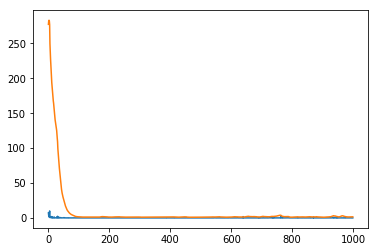

In [17]:
plt.plot(loss)
plt.plot(Loss) 

In [13]:
Loss[-1]

array([26.58521559])

In [ ]:
# compare parameters side by side
np.hstack([params[-1],model.coef_.T])